### Correlation Map 과 Networkx 그래프로 키워드간 상관관계 시각화하기

In [40]:
import pandas as pd

csv_file_path = 'df_with_keywords.csv'

df = pd.read_csv(csv_file_path)


list_columns = {column: df['키워드'].apply(lambda x: x.split(', ') if pd.notna(x) else []) for column in df.columns}

df_lists = pd.DataFrame(list_columns)

In [ ]:
df = df.drop('Text', axis=1).reset_index(drop=True)
df['키워드'] = df['키워드'].apply(lambda x: [keyword.strip() for keyword in x.split(',')] if pd.notna(x) else [])

def remove_keyword(keyword_list, keyword_to_remove):
    li = []
    for keyword in keyword_list: 
        if keyword != keyword_to_remove:
            li.append(keyword)
    return li

df['r키워드'] = ''
for index, row in df.iterrows():
    keyword_list = row['키워드']
    removed_keywords = remove_keyword(keyword_list, '로맨스판타지')
    df.at[index, 'r키워드'] = removed_keywords

from itertools import combinations
from collections import Counter

keyword_lists = df['r키워드'].tolist()

keyword_counts = Counter()

for keyword_list in keyword_lists:
    for pair in combinations(keyword_list, 2):
        keyword_counts[pair] += 1

keyword_counts

In [43]:

with open('counter_data.txt', 'w') as txtfile:
    for keyword, count in keyword_counts.items():
        txtfile.write(f'{keyword}: {count}\n')

In [11]:
from matplotlib import font_manager, rc # 한국어!@ 폰트 세팅을 위한 모듈 추가
font_path = "C:\\Windows\\Fonts\\malgun.ttf" # 
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

In [21]:
import matplotlib.font_manager as fm 
from matplotlib import rc
font_name = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


In [17]:
filtered_items = {key: value for key, value in keyword_counts.items() if value > 15}

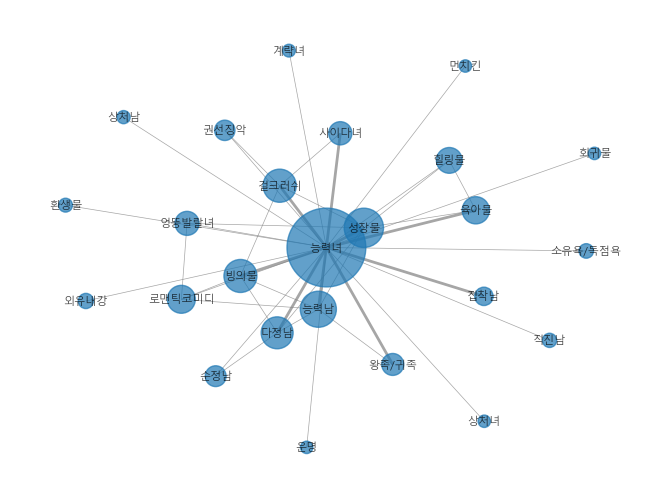

In [33]:

G = nx.Graph()
for (keyword1, keyword2), count in filtered_items.items():
    G.add_edge(keyword1, keyword2, weight=count)


node_weights = dict(G.degree(weight='weight'))
edge_sizes = [2 if count > 30 else 0.5 for count in nx.get_edge_attributes(G, 'weight').values()]

node_sizes = [node_weights[node] * 5 if node_weights[node] > 15 else 5 for node in G.nodes]


pos = nx.spring_layout(G)

nx.draw(G, pos, with_labels=True, font_size=8,font_family=font_name, font_color="black", edge_color="gray", width=edge_sizes, alpha=0.7, node_size=node_sizes)

plt.show()


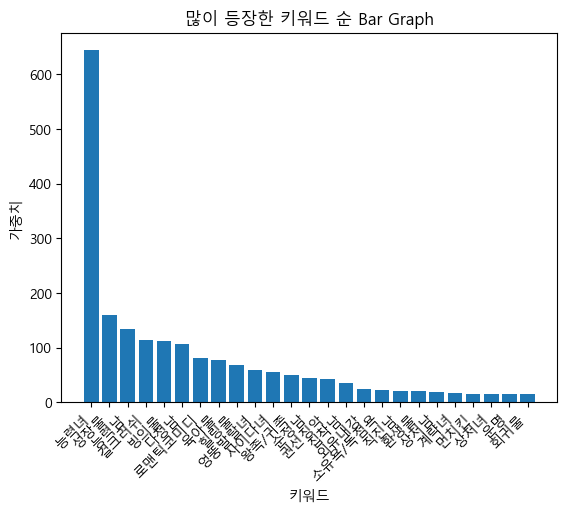

In [34]:

node_weights = dict(G.degree(weight='weight'))

sorted_nodes = sorted(node_weights.items(), key=lambda x: x[1], reverse=True)

plt.bar(range(len(sorted_nodes)), [weight for _, weight in sorted_nodes], align='center')
plt.xticks(range(len(sorted_nodes)), [node for node, _ in sorted_nodes], rotation=45, ha='right')
plt.xlabel('키워드')
plt.ylabel('가중치')
plt.title('많이 등장한 키워드 순 Bar Graph')
plt.show()

#### 원-핫 인코딩 해놨던 csv파일 불러오기 

In [96]:
df_binary = pd.read_csv('binary_data.csv')

In [97]:
df_binary

,착각물,삼각관계,걸크러쉬,순진녀,천재,외유내강,암투물,악녀,치유물,성장물,...,차원이동,계략남,사차원남,개그물,조신남,환생물,능글녀,상처남,뇌섹녀,재회물
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
189,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
#히트맵이 너무 큼. 키워드가 한 번 밖에 안나온 열의 키워드는 모두 삭제 
columns_to_remove = df_binary.columns[df_binary.sum(axis=0) <= 30]


df_binary = df_binary.drop(columns=columns_to_remove)
# df_binary = df_binary.drop(columns=columns_to_remove2)

In [110]:
df_binary

,걸크러쉬,외유내강,성장물,로맨틱코미디,왕족/귀족,순정남,육아물,운명,사이다녀,집착남,...,소유욕/독점욕,로맨스판타지,다정남,능력녀,능력남,회귀물,힐링물,빙의물,권선징악,상처남
0,1,0,0,1,0,0,0,1,0,1,...,1,1,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,1,0
3,1,0,0,0,0,0,1,0,0,1,...,0,1,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,0,0,0,0,0,0,0,0,1,1,...,0,1,0,1,0,0,0,0,0,0
188,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
189,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
190,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


             걸크러쉬      외유내강       성장물    로맨틱코미디     왕족/귀족       순정남       육아물  \
걸크러쉬     1.000000 -0.121228  0.059450 -0.028046  0.091439  0.117341 -0.066881   
외유내강    -0.121228  1.000000  0.033752  0.017047 -0.011353 -0.023267  0.029617   
성장물      0.059450  0.033752  1.000000 -0.179594 -0.063908 -0.064657  0.291233   
로맨틱코미디  -0.028046  0.017047 -0.179594  1.000000  0.063912  0.030502 -0.095926   
왕족/귀족    0.091439 -0.011353 -0.063908  0.063912  1.000000  0.123614  0.021296   
순정남      0.117341 -0.023267 -0.064657  0.030502  0.123614  1.000000  0.043644   
육아물     -0.066881  0.029617  0.291233 -0.095926  0.021296  0.043644  1.000000   
운명       0.008854  0.088588 -0.019558 -0.002352  0.024539  0.144451 -0.024517   
사이다녀     0.236586 -0.113096 -0.106002 -0.006613  0.056745  0.021061 -0.048956   
집착남     -0.032836  0.125524 -0.106002  0.103795 -0.114830 -0.184054 -0.048956   
엉뚱발랄녀   -0.043284  0.139522  0.104526  0.356866  0.011720  0.093191  0.051364   
소유욕/독점욕 -0.041301  0.139543 

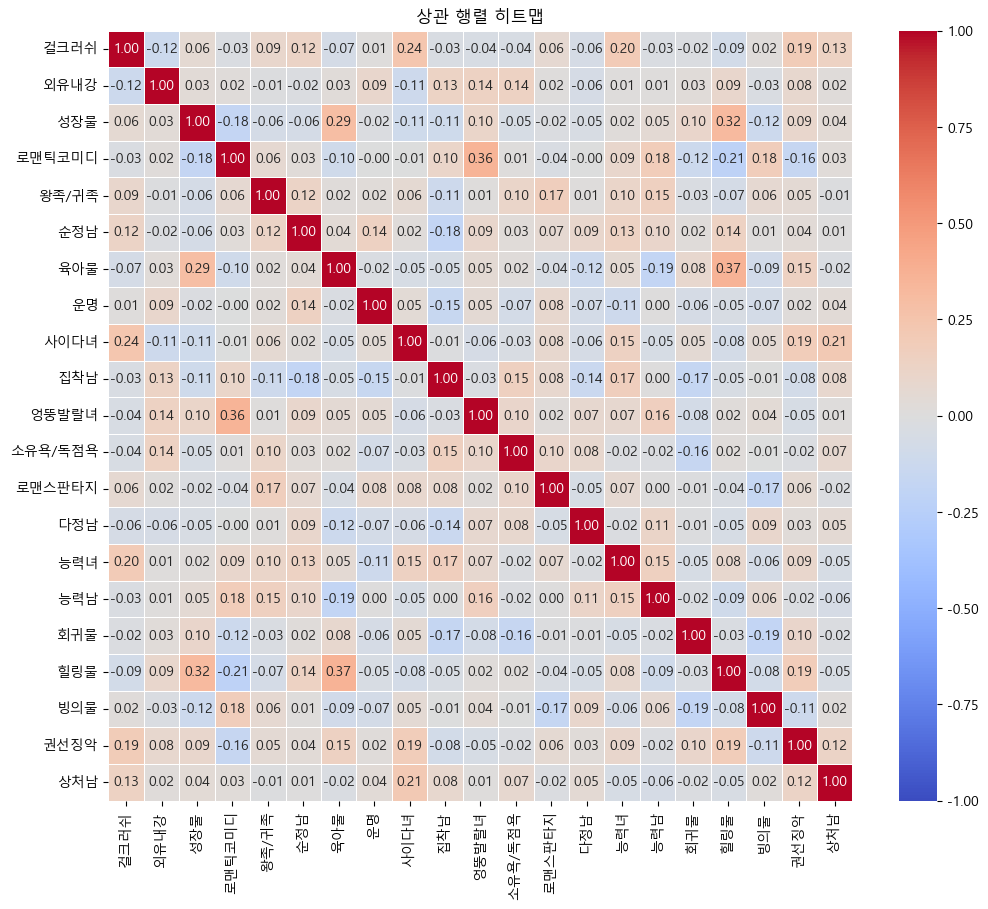

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_binary.corr()


print(correlation_matrix)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", vmin=-1, vmax=1, annot=True, fmt=".2f", linewidths=0.5)
plt.title('상관 행렬 히트맵')
plt.show()

In [104]:

top_correlations = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates().nlargest(20)
print("Top 10 Correlations:")
print(top_correlations)

top_correlations_df = pd.DataFrame(top_correlations, columns=['Correlation'])
top_correlations_df.index.names = ['키워드 1', '키워드 2']
print("Top 10 Correlations:")
print(top_correlations_df)

bottom_correlations = correlation_matrix.unstack().sort_values(ascending=True).drop_duplicates().nsmallest(20)
print("\nBottom 10 Correlations:")
print(bottom_correlations)

bottom_correlations_df = pd.DataFrame(bottom_correlations, columns=['Correlation'])
bottom_correlations_df.index.names = ['키워드 1', '키워드 2']
print("Bottom 10 Correlations:")
print(bottom_correlations_df)

Top 10 Correlations:
착각물     착각물      1.000000
평범녀     갑을관계     0.555312
남장여자물   남장여자     0.494737
동정남     절륜남      0.491651
평범녀     순진녀      0.434778
        동거물      0.434097
삼각관계    잔잔물      0.434097
직진녀     철벽남      0.417855
피폐물     가상시대물    0.417855
조직/암흑가  순진녀      0.416180
애교남     피폐물      0.400709
소꿉친구    친구>연인    0.385038
절륜남     타임슬립     0.383957
다정녀     치유물      0.381538
라이벌/앙숙  경쟁구도     0.379857
철벽녀     쌍방삽질     0.376630
육아물     힐링물      0.366233
재회물     배틀연애     0.363092
인외존재    중세물      0.360750
로맨틱코미디  엉뚱발랄녀    0.356866
dtype: float64
Top 10 Correlations:
              Correlation
키워드 1  키워드 2             
착각물    착각물       1.000000
평범녀    갑을관계      0.555312
남장여자물  남장여자      0.494737
동정남    절륜남       0.491651
평범녀    순진녀       0.434778
       동거물       0.434097
삼각관계   잔잔물       0.434097
직진녀    철벽남       0.417855
피폐물    가상시대물     0.417855
조직/암흑가 순진녀       0.416180
애교남    피폐물       0.400709
소꿉친구   친구>연인     0.385038
절륜남    타임슬립      0.383957
다정녀    치유물       0.381538
라이벌/앙숙 

In [105]:
top_correlations_df

Correlation
키워드 1  키워드 2             
착각물    착각물       1.000000
평범녀    갑을관계      0.555312
남장여자물  남장여자      0.494737
동정남    절륜남       0.491651
평범녀    순진녀       0.434778
       동거물       0.434097
삼각관계   잔잔물       0.434097
직진녀    철벽남       0.417855
피폐물    가상시대물     0.417855
조직/암흑가 순진녀       0.416180
애교남    피폐물       0.400709
소꿉친구   친구>연인     0.385038
절륜남    타임슬립      0.383957
다정녀    치유물       0.381538
라이벌/앙숙 경쟁구도      0.379857
철벽녀    쌍방삽질      0.376630
육아물    힐링물       0.366233
재회물    배틀연애      0.363092
인외존재   중세물       0.360750
로맨틱코미디 엉뚱발랄녀     0.356866

In [106]:
bottom_correlations_df

,,Correlation
키워드 1,키워드 2,
후회남,능력녀,-0.226637
힐링물,로맨틱코미디,-0.211096
걸크러쉬,다정녀,-0.207608
능력녀,후회녀,-0.206284
빙의물,초월적존재,-0.191523
무심녀,엉뚱발랄녀,-0.187452
차원이동,로맨스판타지,-0.187349
육아물,능력남,-0.187300
빙의물,회귀물,-0.186334


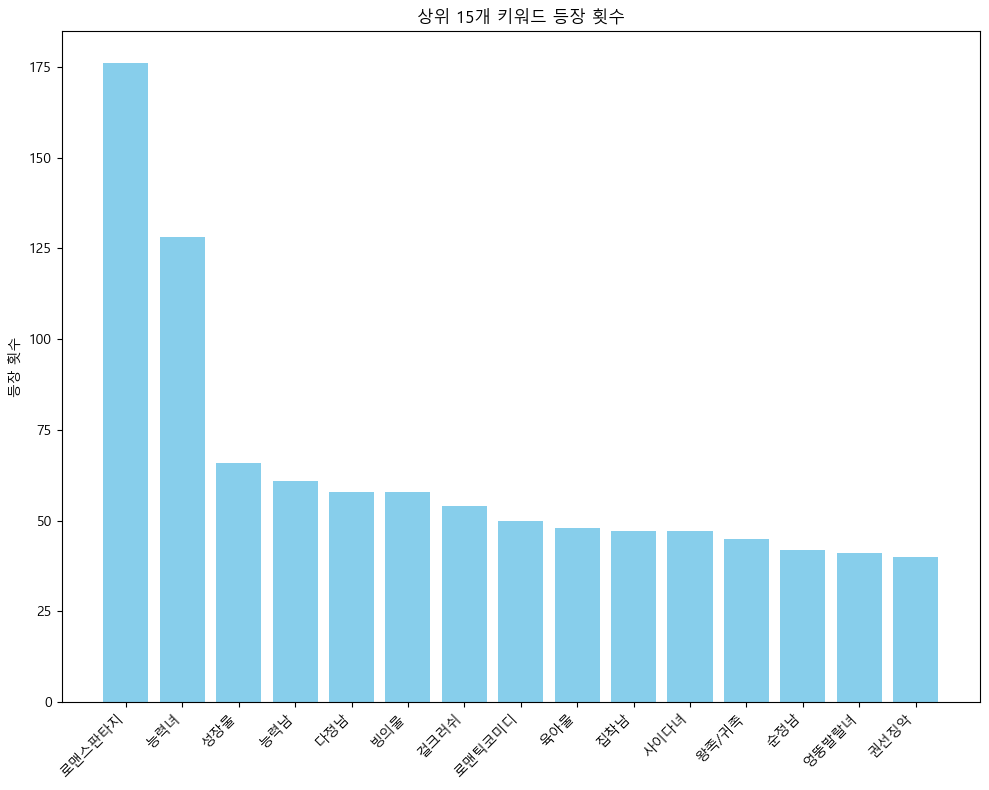

In [108]:
import matplotlib.pyplot as plt

top_keywords = dict(sorted(keyword_counts.items(), key=lambda item: item[1], reverse=True)[:15])

plt.figure(figsize=(10, 8))
plt.bar(list(top_keywords.keys()), list(top_keywords.values()), color='skyblue')
plt.ylabel('등장 횟수')
plt.title('상위 15개 키워드 등장 횟수')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()